<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Nearest Centroid Classifier With Scale And Polynomial Features

### The Classification task using a NearestCentroid Classifier where rescaling is done using Scale and feature transformation is done via Polynomial Features.

### Required Packages

In [ ]:
!pip install imblearn

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [ ]:
#filepath
file_path= ""

List of features which are  required for model training.

In [7]:
#x_values
features=[]

Target feature for prediction.

In [8]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [9]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [11]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.


In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,1,0
3,15603246,27,57000,1,0
4,15804002,19,76000,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

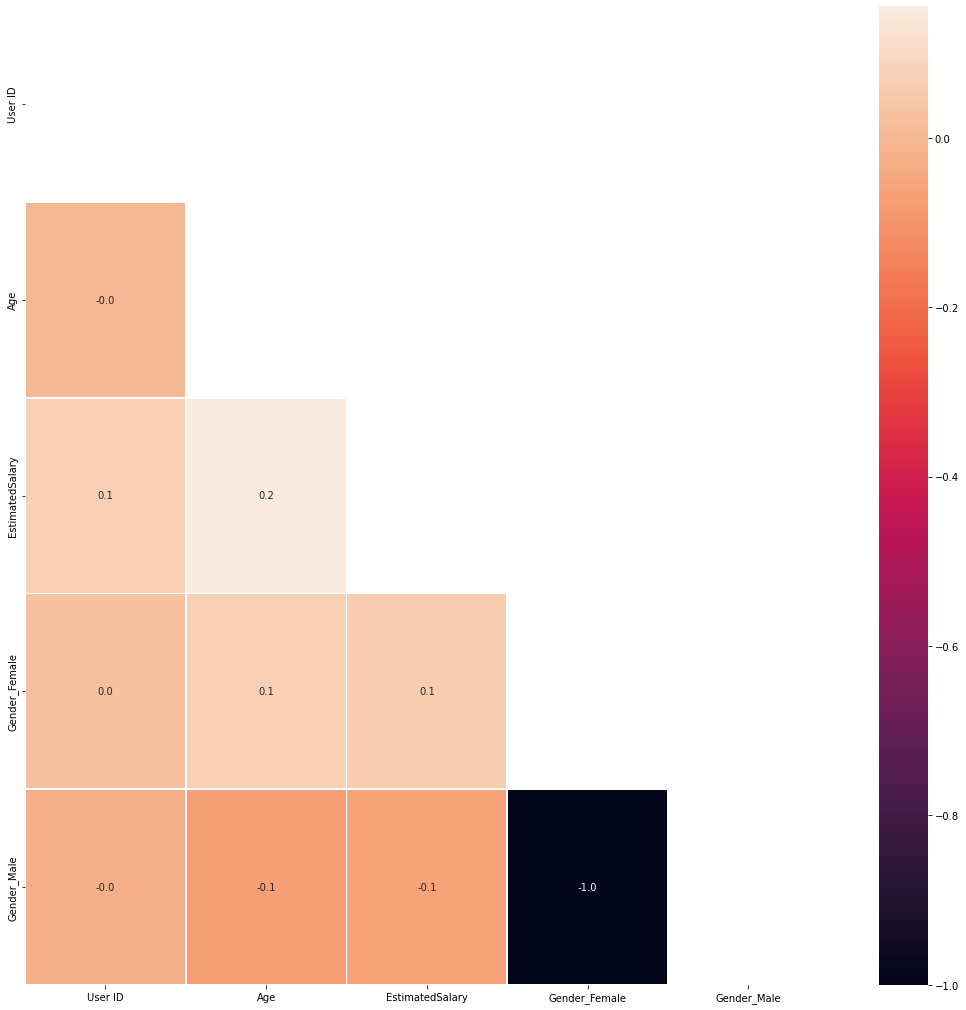

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

###Handling Target Imbalance
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [15]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

###Data Rescaling
####Scale

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [16]:
x_train =scale(x_train)
x_test = scale(x_test)

### Polynomial Features

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Generate polynomial and interaction features.

###Model
The NearestCentroid classifier is a simple algorithm that represents each class by the centroid of its members. In effect, this makes it similar to the label updating phase of the KMeans algorithm. It also has no parameters to choose, making it a good baseline classifier. It does, however, suffer on non-convex classes, as well as when classes have drastically different variances, as equal variance in all dimensions is assumed.

####Tuning Parameters:
**metric**: The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by metrics.pairwise.pairwise_distances for its metric parameter. The centroids for the samples corresponding to each class is the point from which the sum of the distances of all samples that belong to that particular class are minimized. If the “manhattan metric is provided, this centroid is the median and for all other metrics, the centroid is now set to be the mean.

**shrink_threshold**: Threshold for shrinking centroids to remove features.

In [17]:
# Build Model here
model = make_pipeline(PolynomialFeatures(), NearestCentroid())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('nearestcentroid',
                 NearestCentroid(metric='euclidean', shrink_threshold=None))],
         verbose=False)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [18]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 85.00 %



###Confusion Matrix
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

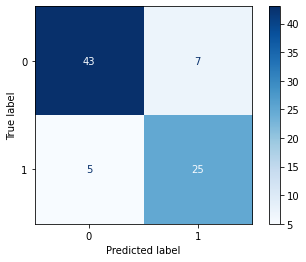

In [19]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

###Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.
#####where:
#####Precision:- Accuracy of positive predictions.
#####Recall:- Fraction of positives that were correctly identified.
#####f1-score:- percent of positive predictions were correct
#####support:- Support is the number of actual occurrences of the class in the specified dataset.

In [20]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.78      0.83      0.81        30

    accuracy                           0.85        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.85      0.85        80



#### Creator: Ayush Gupta , Github: [Profile](https://github.com/guptayush179)